In [108]:
import DeriveAlive as da
import numpy as np
import matplotlib.pyplot as plt

#### Case 1: three points spline (NOT WORKING SEE CASE 2)

In [18]:
x1 = da.Var([-1])
x2 = da.Var([0])
x3 = da.Var([1])

In [19]:
f = da.Var([x1, x1**2])

In [20]:
def f(var):
    return var ** 2

In [21]:
f(x1)

Var([1], [-2])

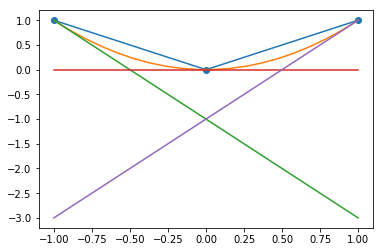

In [41]:
plt.plot([x1.val, x2.val, x3.val], [f(x1).val, f(x2).val, f(x3).val], 'o-')

# Plot original function
xs = np.linspace(-1, 1, 20)
plt.plot(xs, xs**2)

# Cut line at x1
plt.plot(xs, f(x1).der * xs + b(x1))

# Cut line at x2
plt.plot(xs, f(x2).der * xs + b(x2))

# Cut line at x3
plt.plot(xs, f(x3).der * xs + b(x3))

plt.show()

In [36]:
def b(var):
    return f(var).val - f(var).der * var.val

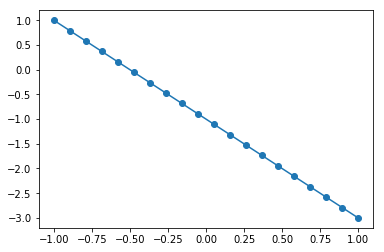

In [38]:
plt.plot(xs, f(x1).der * xs + b(x1), 'o-')
plt.show()

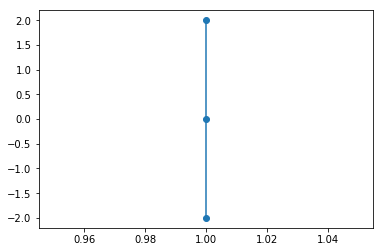

In [28]:
plt.plot([x1.der, x2.der, x3.der], [f(x1).der, f(x2).der, f(x3).der], 'o-')
plt.show()

#### Case 2: Quadratic spline

In [195]:
def a(var):
    return var ** 2

def b(var):
    return var

def c(var):
    return da.Var(1)

def quadSplineCoeff(N):
    # We will solve for x in y = Ax using np.linalg.solve
    h = 1/N
    ks = []
    for i in np.linspace(-3.14, 3.14, N+1):
        k = da.Var(i)
        ks.append(k)
        
    # Construct y
    y = []
    for i in range(N):
        y.append(f(ks[i]).val)
        y.append(f(ks[i+1]).val)
    for i in range(N):
        y.append([0])
    y = np.vstack(y)
    
    # Construct A
    A = np.zeros((3*N, 3*N))
    # Constraint 1:
    for i in range(N):
        A[2*i, 3*i] = a(ks[i]).val
        A[2*i, 3*i+1] = b(ks[i]).val
        A[2*i, 3*i+2] = c(ks[i]).val
        A[2*i+1, 3*i] = a(ks[i+1]).val
        A[2*i+1, 3*i+1] = b(ks[i+1]).val
        A[2*i+1, 3*i+2] = c(ks[i+1]).val
    # Constraint 2:
    for i in range(N-1):
        A[2*N+i, 3*i] = a(ks[i+1]).der
        A[2*N+i, 3*i+1] = b(ks[i+1]).der
        A[2*N+i, 3*i+3] = -1*a(ks[i+1]).der
        A[2*N+i, 3*i+4] = -1*b(ks[i+1]).der
    # Constraint 3:
    A[3*N-1, 1] = 10*b(ks[0]).der
    A[3*N-1, -3] = -1*a(ks[-1]).der
    A[3*N-1, -2] = -1*b(ks[-1]).der
    
    coeffs = np.linalg.solve(A, y)
        
    return y, A, coeffs, ks

In [192]:
N = 10

def f(var):
    return var.sin()
    
y, A, coeffs, ks = quadSplineCoeff(N)

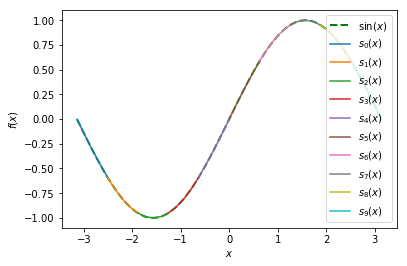

In [193]:
# Plot the function
fx = np.linspace(-3.14, 3.14, 100)
fy = np.sin(fx)
plt.plot(fx, fy, 'g--', linewidth=2, label=r'$\sin(x)$')

# Plot the splines
for i in range(N):
    a = coeffs[3*i]
    b = coeffs[3*i+1]
    c = coeffs[3*i+2]
    sx = np.linspace(ks[i].val, ks[i+1].val, 5)
    sy = a*(sx**2) + b*sx + c
    plt.plot(sx, sy, label=r'$s_{%s}(x)$' % i)

plt.xlabel(r'$x$')
plt.ylabel(r'$f(x)$')
plt.axis()
plt.legend()
plt.show()

In [196]:
N = 10

def f(var):
    return 10**var
    
y, A, coeffs, ks = quadSplineCoeff(N)

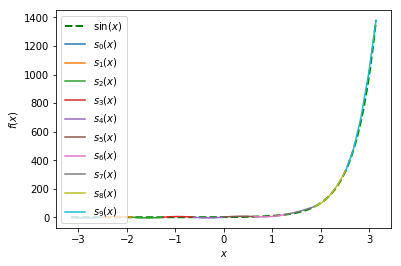

In [199]:
# Plot the function
fx = np.linspace(-3.14, 3.14, 100)
fy = 10**fx
plt.plot(fx, fy, 'g--', linewidth=2, label=r'$\sin(x)$')

# Plot the splines
for i in range(N):
    a = coeffs[3*i]
    b = coeffs[3*i+1]
    c = coeffs[3*i+2]
    sx = np.linspace(ks[i].val, ks[i+1].val, 5)
    sy = a*(sx**2) + b*sx + c
    plt.plot(sx, sy, label=r'$s_{%s}(x)$' % i)

plt.xlabel(r'$x$')
plt.ylabel(r'$f(x)$')
plt.axis()
plt.legend(loc='lower left')
plt.show()